# Is podium


## Dependencies


The dependencies used are as follows


In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer

import sys

sys.path.append("..")

from utils.visualization import model_test
from utils.custom_cvs import VariableTimeSeriesSplit
from utils.custom_scorers import balanced_accuracy_score

import numpy as np
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import warnings

warnings.simplefilter("ignore")

## Initialization


We continue with the validation of the model that predicts the podium


In [2]:
df = pd.read_csv("../assets/data/processed/adding_data.csv")

instances_per_year = df["raceYear"].value_counts(sort=False)
instances_per_half = (
    np.array(
        list(zip(np.floor(instances_per_year / 2), np.ceil(instances_per_year / 2)))
    )
    .flatten()
    .astype(np.int32)
)

n_splits = len(instances_per_half) - 10
max_train_size = [instances_per_half[i : 10 + i].sum() for i in range(n_splits)]
test_size = instances_per_half[10:].tolist()
tscv = VariableTimeSeriesSplit(
    n_splits=n_splits, max_train_size=max_train_size, test_size=test_size
)

scorers = [make_scorer(balanced_accuracy_score)]
labels = np.array(["not_podium", "podium"])
podiums = df[df["positionFinal"].isin([1, 2, 3])][
    ["raceYear", "raceRound", "driverRef"]
]
podiums = podiums.groupby(by=["raceYear", "raceRound"]).agg({"driverRef": ",".join})

X = pd.read_csv("../assets/data/processed/adding_data_X.csv")
y = df.merge(podiums, how="left", on=["raceYear", "raceRound"], suffixes=("", "Podium"))
y = y.apply(lambda x: x["driverRef"] in x["driverRefPodium"], axis=1)

## K-Nearest Neighbors


KNeighborsClassifier(metric='cosine', n_neighbors=53, weights='distance'):
CV with make_scorer(balanced_accuracy_score): 0.8222062829648459
              precision    recall  f1-score   support

  not_podium       0.95      0.94      0.94      4545
      podium       0.65      0.71      0.68       756

    accuracy                           0.90      5301
   macro avg       0.80      0.82      0.81      5301
weighted avg       0.91      0.90      0.91      5301



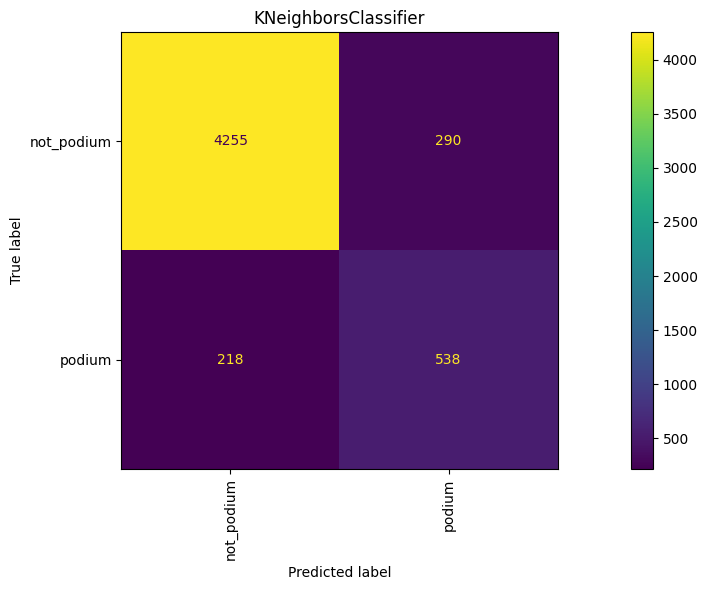

In [3]:
X_selected = X[
    [
        "carNumber",
        "positionGrid",
        "driverNumber",
        "constructorRef",
        "raceYear",
        "driverWins",
        "weather",
        "weatherWarm",
        "weatherCold",
        "weatherDry",
        "weatherWet",
        "weatherCloudy",
        "circuitType",
        "circuitDirection",
        "circuitLength",
        "circuitLaps",
        "circuitDist",
        "qMin",
        "qMax",
        "qAvg",
        "driverAgeStarted",
        "driverExpYear",
        "driverExpRace",
        "driverPodiums",
        "driverPos2",
        "driverPos3",
        "driverPos4",
        "driverPos5",
        "driverPos6",
        "driverPos7",
        "driverPos8",
        "driverPos9",
        "driverPos10",
        "driverPos11",
        "driverPos12",
        "driverPos13",
        "driverPos14",
        "driverPos15",
        "driverPos16",
        "driverPos17",
        "driverPos18",
        "driverExp",
        "driverRac",
        "driverAwa",
        "driverPac",
        "driverOvr",
    ]
]
knn = KNeighborsClassifier(n_neighbors=53, metric="cosine", weights="distance")
model_test((knn,), X_selected, y, tscv, scorers=scorers, labels=labels)

KNeighborsClassifier(metric='cosine', n_neighbors=53, weights='distance'):
CV with make_scorer(balanced_accuracy_score): 0.7823318682944572
              precision    recall  f1-score   support

  not_podium       0.94      0.94      0.94      4545
      podium       0.63      0.63      0.63       756

    accuracy                           0.90      5301
   macro avg       0.79      0.79      0.79      5301
weighted avg       0.90      0.90      0.90      5301



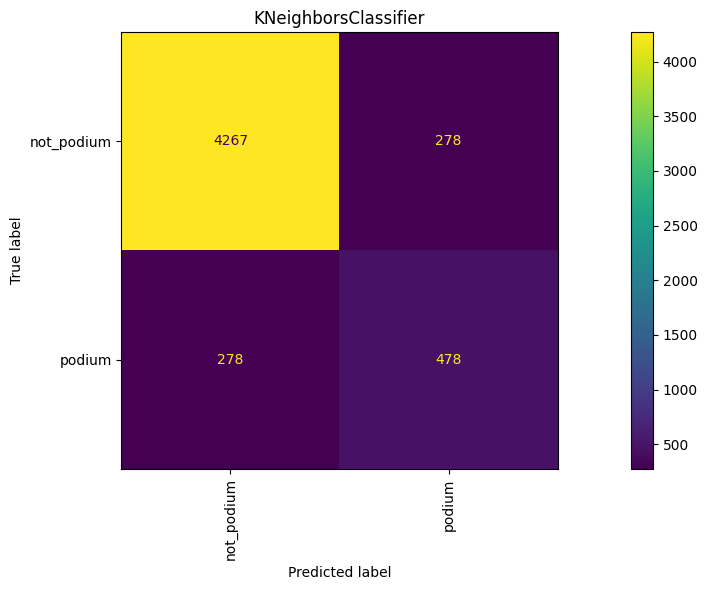

In [4]:
knn = KNeighborsClassifier(n_neighbors=53, metric="cosine", weights="distance")
model_test((knn,), X, y, tscv, scorers=scorers, labels=labels)

## Decision Tree


DecisionTreeClassifier(max_depth=3):
CV with make_scorer(balanced_accuracy_score): 0.7898019722016656
              precision    recall  f1-score   support

  not_podium       0.94      0.96      0.95      4545
      podium       0.73      0.61      0.67       756

    accuracy                           0.91      5301
   macro avg       0.84      0.79      0.81      5301
weighted avg       0.91      0.91      0.91      5301



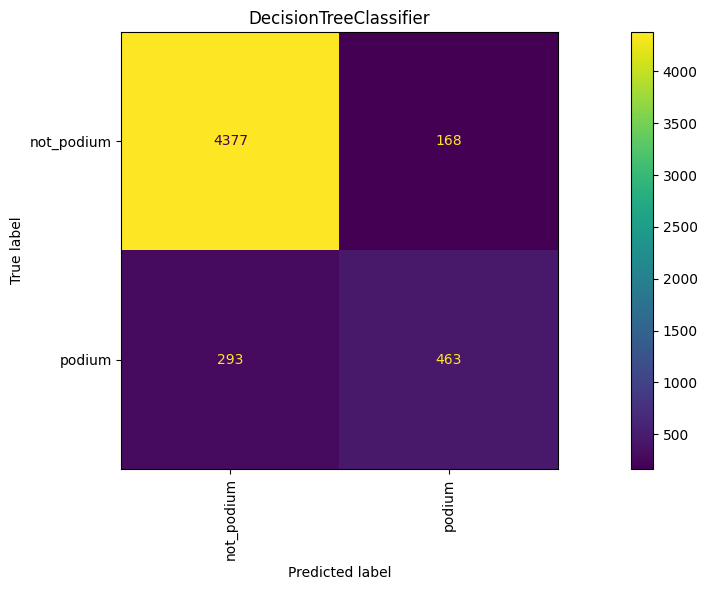

In [5]:
X_selected = X[
    [
        "carNumber",
        "positionGrid",
        "driverRef",
        "constructorRef",
        "constructorNationality",
        "raceYear",
        "raceRound",
        "grandPrix",
        "raceTime",
        "circuitRef",
        "circuitLocation",
        "circuitCountry",
        "circuitLat",
        "circuitLng",
        "circuitAlt",
        "driverWins",
        "constructorWins",
        "q1",
        "q2",
        "q3",
        "weather",
        "weatherWarm",
        "weatherCold",
        "weatherDry",
        "weatherWet",
        "weatherCloudy",
        "circuitType",
        "circuitDirection",
        "circuitLength",
        "circuitLaps",
        "circuitDist",
        "qMin",
        "qMax",
        "qAvg",
        "driverAgeStarted",
        "driverExpYear",
        "driverExpRace",
        "driverPodiums",
        "driverPos2",
        "driverPos3",
        "driverPos4",
        "driverPos5",
        "driverPos6",
        "driverPos7",
        "driverPos8",
        "driverPos9",
        "driverPos10",
        "driverPos11",
        "driverPos12",
        "driverPos13",
        "driverPos14",
        "driverPos15",
        "driverPos16",
        "driverPos17",
        "driverPos18",
        "driverExp",
        "driverRac",
        "driverAwa",
        "driverPac",
        "driverOvr",
    ]
]
tree = DecisionTreeClassifier(max_depth=3, criterion="gini", splitter="best")
model_test((tree,), X_selected, y, tscv, scorers=scorers, labels=labels)

DecisionTreeClassifier(max_depth=3):
CV with make_scorer(balanced_accuracy_score): 0.7898019722016656
              precision    recall  f1-score   support

  not_podium       0.94      0.96      0.95      4545
      podium       0.73      0.61      0.67       756

    accuracy                           0.91      5301
   macro avg       0.84      0.79      0.81      5301
weighted avg       0.91      0.91      0.91      5301



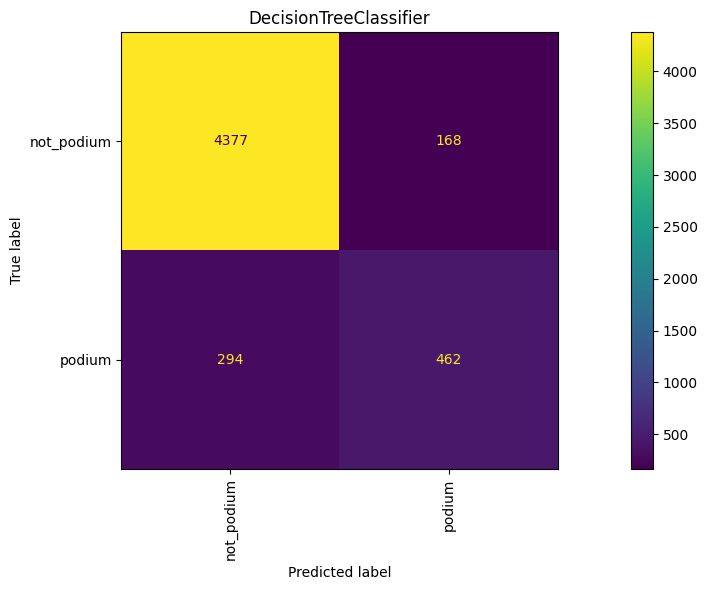

In [6]:
tree = DecisionTreeClassifier(max_depth=3, criterion="gini", splitter="best")
model_test((tree,), X, y, tscv, scorers=scorers, labels=labels)

## Random Forest


RandomForestClassifier(max_depth=8, n_estimators=440):
CV with make_scorer(balanced_accuracy_score): 0.810301916240686
              precision    recall  f1-score   support

  not_podium       0.94      0.96      0.95      4545
      podium       0.72      0.66      0.69       756

    accuracy                           0.92      5301
   macro avg       0.83      0.81      0.82      5301
weighted avg       0.91      0.92      0.91      5301



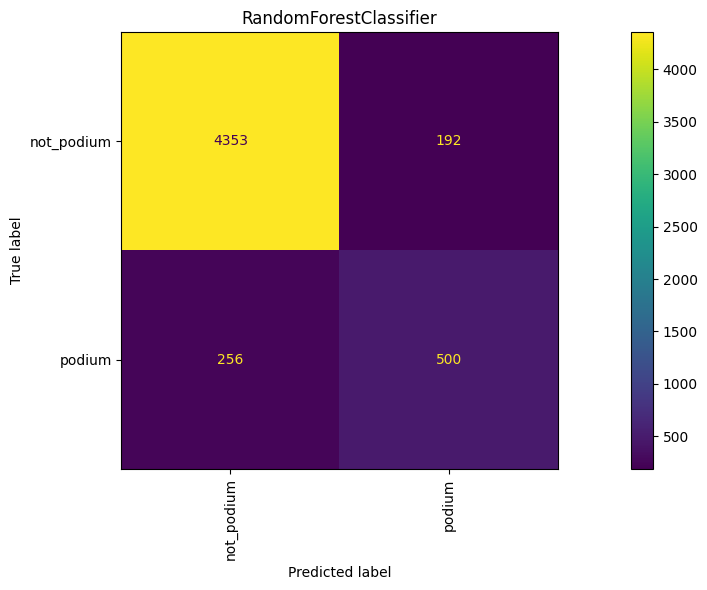

In [7]:
X_selected = X[
    [
        "positionGrid",
        "driverRef",
        "raceYear",
        "circuitLng",
        "driverWins",
        "q1",
        "weather",
        "weatherWarm",
        "weatherCold",
        "weatherDry",
        "weatherWet",
        "weatherCloudy",
        "circuitType",
        "circuitDirection",
        "circuitLength",
        "circuitLaps",
        "circuitDist",
        "qMin",
        "qMax",
        "qAvg",
        "driverAgeStarted",
        "driverExpYear",
        "driverExpRace",
        "driverPodiums",
        "driverPos2",
        "driverPos3",
        "driverPos4",
        "driverPos5",
        "driverPos6",
        "driverPos7",
        "driverPos8",
        "driverPos9",
        "driverPos10",
        "driverPos11",
        "driverPos12",
        "driverPos13",
        "driverPos14",
        "driverPos15",
        "driverPos16",
        "driverPos17",
        "driverPos18",
        "driverExp",
        "driverRac",
        "driverAwa",
        "driverPac",
        "driverOvr",
    ]
]
random_forest = RandomForestClassifier(max_depth=8, n_estimators=440, criterion="gini")
model_test((random_forest,), X_selected, y, tscv, scorers=scorers, labels=labels)

RandomForestClassifier(max_depth=8, n_estimators=440):
CV with make_scorer(balanced_accuracy_score): 0.8035081974351811
              precision    recall  f1-score   support

  not_podium       0.94      0.96      0.95      4545
      podium       0.72      0.66      0.69       756

    accuracy                           0.91      5301
   macro avg       0.83      0.81      0.82      5301
weighted avg       0.91      0.91      0.91      5301



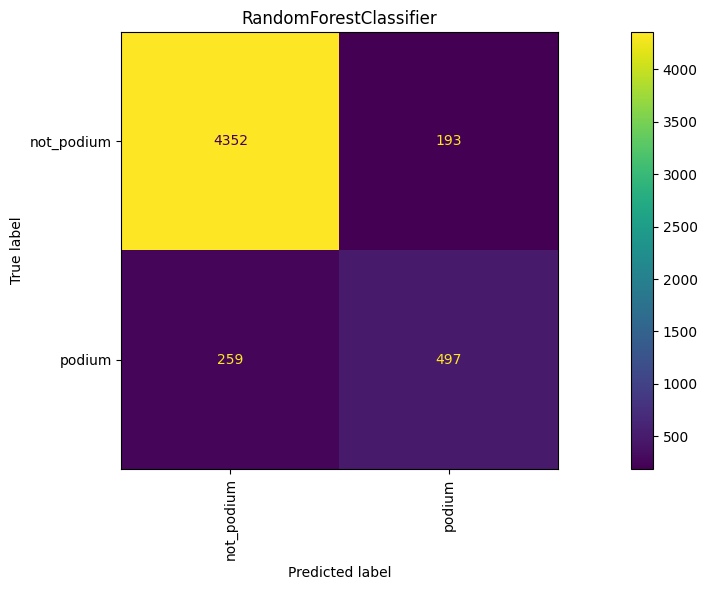

In [8]:
random_forest = RandomForestClassifier(max_depth=8, n_estimators=440, criterion="gini")
model_test((random_forest,), X, y, tscv, scorers=scorers, labels=labels)

## Multilayer Perceptron


MLPClassifier(activation='logistic', hidden_layer_sizes=(63, 30, 7)):
CV with make_scorer(balanced_accuracy_score): 0.8490092684318391
              precision    recall  f1-score   support

  not_podium       0.96      0.93      0.95      4545
      podium       0.65      0.77      0.70       756

    accuracy                           0.91      5301
   macro avg       0.80      0.85      0.82      5301
weighted avg       0.92      0.91      0.91      5301



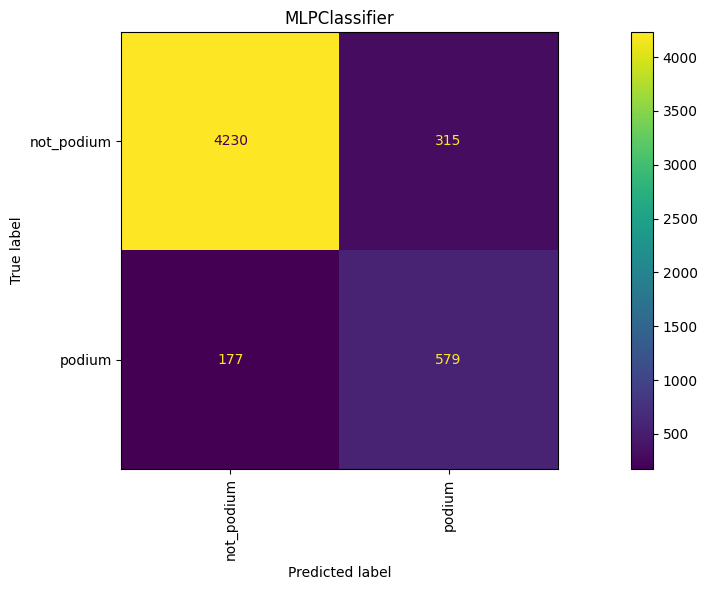

In [9]:
X_selected = X[
    [
        "carNumber",
        "positionGrid",
        "driverRef",
        "driverNumber",
        "driverNationality",
        "raceYear",
        "raceRound",
        "circuitRef",
        "circuitLocation",
        "circuitLat",
        "circuitAlt",
        "driverWins",
        "q1",
        "q2",
        "q3",
        "driverAgeToday",
        "driverAgeAtRace",
        "weather",
        "weatherWarm",
        "weatherCold",
        "weatherDry",
        "weatherWet",
        "weatherCloudy",
        "circuitType",
        "circuitDirection",
        "circuitLength",
        "circuitLaps",
        "circuitDist",
        "qMin",
        "qMax",
        "qAvg",
        "driverAgeStarted",
        "driverExpYear",
        "driverExpRace",
        "driverPodiums",
        "driverPos2",
        "driverPos3",
        "driverPos4",
        "driverPos5",
        "driverPos6",
        "driverPos7",
        "driverPos8",
        "driverPos9",
        "driverPos10",
        "driverPos11",
        "driverPos12",
        "driverPos13",
        "driverPos14",
        "driverPos15",
        "driverPos16",
        "driverPos17",
        "driverPos18",
        "driverExp",
        "driverRac",
        "driverAwa",
        "driverPac",
        "driverOvr",
    ]
]
nn = MLPClassifier(activation="logistic", hidden_layer_sizes=(63, 30, 7))
model_test((nn,), X_selected, y, tscv, scorers=scorers, labels=labels)

MLPClassifier(activation='logistic', hidden_layer_sizes=(63, 30, 7)):
CV with make_scorer(balanced_accuracy_score): 0.8473139466146251
              precision    recall  f1-score   support

  not_podium       0.96      0.93      0.95      4545
      podium       0.65      0.78      0.71       756

    accuracy                           0.91      5301
   macro avg       0.80      0.86      0.83      5301
weighted avg       0.92      0.91      0.91      5301



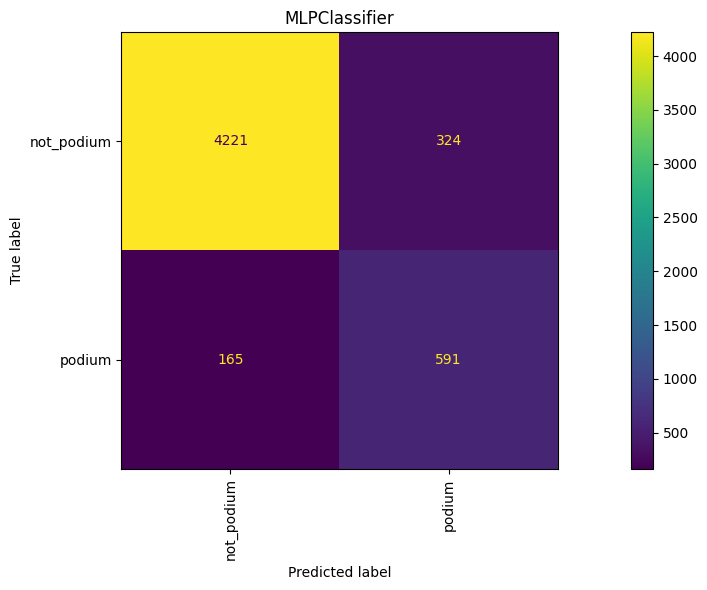

In [10]:
nn = MLPClassifier(activation="logistic", hidden_layer_sizes=(63, 30, 7))
model_test((nn,), X, y, tscv, scorers=scorers, labels=labels)

## Results


Based on the model in the previous section, i.e. with optimised attributes, performance has improved.

In this case, performance has been improved too.

Note that by adding so many attributes, it would be recommended, as mentioned before, to do selection and tuning.
